<a href="https://colab.research.google.com/github/GabrielOchoaPizano/analisis-visualizacion/blob/main/practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Obtención del conjunto de datos<p>
Se debe implementar un programa que consuma los datos desde un servidor
generador de datos en el canal4-1 únicamente, ya que corresponde a los
datos de la práctica 4 en su primera parte. El conjunto de datos crea una
nube inicial de puntos.

In [ ]:
import redis
import time, json
import csv

r = redis.Redis(host='192.168.68.105', port=6379, db=0, charset="utf-8", decode_responses=True)

p = r.pubsub()

p.subscribe("canal4-1")

csv_file = open('data.csv', mode='w', newline='')
fieldnames = ['id', 'clase', 'x'] # lista con los nombres de los campos que quieres guardar en el archivo CSV
writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
writer.writeheader()

while True:
  message = p.get_message()
  if message and message.get("type") == "message":
    data = json.loads(message['data'].encode('utf-8'))
    print(message)
    writer.writerow(data)
  time.sleep(0.01)

csv_file.close()

2. Visualización inicial de los datos<p>
En este punto se deben imprimir los datos obtenidos y visualizarlos de
manera gráfica. Se debe tener claridad de cómo llegan los datos para
organizarlos en las estructuras requeridas para los formatos de las librerías
de matplotlib

In [1]:
from google.colab import drive

drive.mount('/content/drive')
carpeta_nombre = "/content/drive/MyDrive/A&V/"
archivo_nombre = "data.csv"
ruta_completa = carpeta_nombre + archivo_nombre

Mounted at /content/drive


In [2]:
import pandas as pd

datos = pd.read_csv(ruta_completa)

print(datos)


      id  clase                     x
0      0      0  [5.1, 3.5, 1.4, 0.2]
1      1      0  [4.9, 3.0, 1.4, 0.2]
2      2      0  [4.7, 3.2, 1.3, 0.2]
3      3      0  [4.6, 3.1, 1.5, 0.2]
4      4      0  [5.0, 3.6, 1.4, 0.2]
..   ...    ...                   ...
145  145      2  [6.7, 3.0, 5.2, 2.3]
146  146      2  [6.3, 2.5, 5.0, 1.9]
147  147      2  [6.5, 3.0, 5.2, 2.0]
148  148      2  [6.2, 3.4, 5.4, 2.3]
149  149      2  [5.9, 3.0, 5.1, 1.8]

[150 rows x 3 columns]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval


datos2 = pd.read_csv(ruta_completa, converters={"x": literal_eval})
matriz2 = np.array(datos2["x"].tolist())
print(matriz2)



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

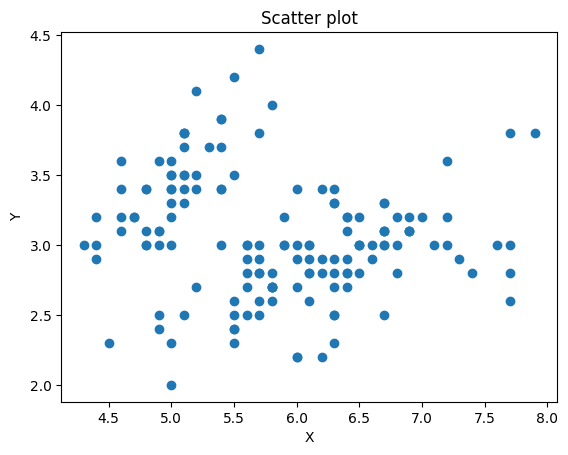

In [5]:
plt.scatter(matriz2[:,0], matriz2[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot')
plt.show()

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_1= pca.fit_transform(matriz2)
pca_1.shape


(150, 2)

**¿Que devuelve la salida?**
La salida devuelve una tupla la cual nos proporciona el número de filas y columnas de la matriz resultante después de aplicar la transformación PCA.

In [ ]:
pca.explained_variance_ratio_.sum()


0.977685206318795

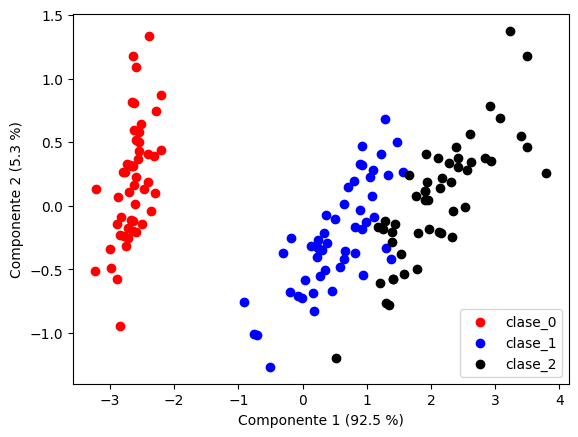

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.decomposition import PCA

# Read CSV file and convert 'x' column to numpy array
datos2 = pd.read_csv(ruta_completa, converters={"x": literal_eval})
matriz2 = np.array(datos2["x"].tolist())

# Define 'target' array based on the 'clase' column
target = datos2['clase'].values

# Perform PCA
pca = PCA(n_components=2)
pca_1 = pca.fit_transform(matriz2)

# Plot scatter plot with different colors for each class
clases = ["clase_0", "clase_1", "clase_2"]
color = ["red", "blue", "black"]
for i in range(3):
    plt.scatter(pca_1[target == i, 0], pca_1[target == i, 1], c=color[i], label=clases[i])
    
plt.xlabel('Componente 1 (' + str(round(pca.explained_variance_ratio_[0] * 100, 1)) + ' %)')
plt.ylabel('Componente 2 (' + str(round(pca.explained_variance_ratio_[1] * 100, 1)) + ' %)')
plt.legend()
plt.show()


**¿Cómo se encuentran repartidas las clases ?**
La clase 0 se encuentra de gran manera en el componente 2, mientras que en la componente 1 se encuentran distribuidas la clases 1 y clase 2. 

In [15]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

nombres = ["var0", "var1", "var2", "var3"]

pca = PCA(n_components=2) # Definición del objeto PCA

pca.fit(matriz2) # Ajustar el modelo PCA a los datos

componentes_principales = pca.components_[:2] # Seleccionar las primeras dos componentes principales
dataframe_pca = pd.DataFrame({"Variables" : nombres, "Componente 1" : componentes_principales[0], "Componente 2" : componentes_principales[1]})
print(dataframe_pca)

  Variables  Componente 1  Componente 2
0      var0      0.361387      0.656589
1      var1     -0.084523      0.730161
2      var2      0.856671     -0.173373
3      var3      0.358289     -0.075481


**Comente los resultados obtenidos y haga una investigación más profunda
sobre PCA, cómo método de reducción de orden.**

Se utiliza para encontrar patrones y relaciones en datos multidimensionales. El objetivo principal de PCA es reducir la dimensionalidad del conjunto de datos, es decir, reducir el número de variables o dimensiones en un conjunto de datos.

PCA trabaja mediante la construcción de nuevas variables llamadas componentes principales, que son combinaciones lineales de las variables originales en el conjunto de datos. Estas nuevas variables son ordenadas de acuerdo a su importancia, siendo la primera componente principal la que explica la mayor cantidad de variabilidad en los datos, la segunda componente principal explica la siguiente cantidad más grande de variabilidad, y así sucesivamente.
